In [1]:
from IPython.display import display, Markdown

with open('README.md', 'r') as fh:
    content = fh.read()

display(Markdown(content))
#code I found to open markdown inside notebook.  Makes it easier to remember the steps.

# Lab: Titanic EDA

This week was all about Pandas and plotting. At this point you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Prework
Fork and clone this repo. At the end of this lab, you'll submit a pull request using the `Titanic.ipynb` notebook to answer the questions below.

## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this project
3. Create an iPython notebook and load the csv into pandas.

## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

## Step 4: Exploratory analysis
1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [2]:
#Imports:
import numpy as np
import pandas as pd
import seaborn as sns
# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# This magic line will allow you to generate plots
# within the Jupyter notebook.
%matplotlib inline

In [3]:
#test = pd.read_csv("./data/test.csv")
train = pd.read_csv("./data/train.csv")
#gender = pd.read_csv("./data/gender_submission.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train.isnull().sum())
print(train.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


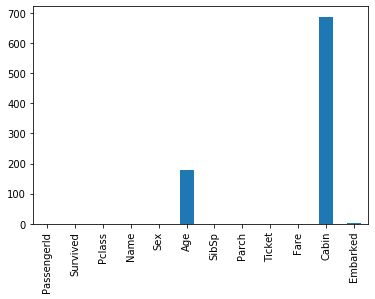

In [6]:
train.isnull().sum().plot(kind = 'bar'); 
#I tried horizontal, but the sliver for 'Embarked' is more visible when verticle

The 'cabin' column has the most missing values, 687 out of 891 missing.

In [7]:
# Delete these row indexes from dataFrame
train = train.dropna(subset=['Embarked'])

In [8]:
#train.PassengerId.count() + train.FamilyCount.count()

In [9]:
print(train.isnull().sum())
#check that rows the Embarked = NA are gone

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [10]:
train['Cabin'].fillna('¯\(ツ)/¯', inplace=True)

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


In [12]:
train['FamilyCount'] = train.SibSp + train.Parch

In [13]:
train.FamilyCount.count()

889

In [14]:
train.Name.count()

889

In [15]:
train.shape

(889, 13)

In [16]:
train['IsReverand'] = train.Name.str.contains('Rev.').astype(int)
#boolean gives int 1 if IsReverand is true

In [17]:
train['Embarked_C'] = train.Name.str.contains('C').astype(int)

In [18]:
train['Embarked_Q'] = train.Name.str.contains('Q').astype(int)

In [19]:
train['Embarked_S'] = train.Name.str.contains('S').astype(int)

In [20]:
train['Is_female'] = train.Sex.str.contains('female').astype(int)


In [21]:
train['Is_male_temp'] = train.Sex == 'male'
#new 'Is_male_temp' column contain boolean true if sex is male
train['Is_male'] = train.Is_male_temp.astype(int)
#change boolean into in so we can do math
train.Name.count() - train.Is_male.sum()
#take difference to get number of females.

312

In [22]:
s = train.Survived.sum() / train.Name.count()
print(f'The survival rate overall was {s} percent.')   

The survival rate overall was 0.38245219347581555 percent.


In [23]:
#since the booleans for these condions have been converted to ints, we only count if survived and Is_male contain 1
print(f'Male survival rate: {100 * np.sum(train.Is_male + train.Survived == 2) / train.Is_male.sum()} percent')

Male survival rate: 18.890814558058924 percent


In [24]:
print(f'Female survival rate: {100 * np.sum(train.Is_female + train.Survived == 2) / train.Is_female.sum()} percent')

Female survival rate: 74.03846153846153 percent


In [25]:
print(f'Pclass 1 survival rate: {100 * np.sum((train.Pclass == 1) + train.Survived == 2) / np.sum(train.Pclass == 1)} percent')
print(f'Pclass 2 survival rate: {100 * np.sum((train.Pclass == 2) + train.Survived == 2) / np.sum(train.Pclass == 2)} percent')
print(f'Pclass 3 survival rate: {100 * np.sum((train.Pclass == 3) + train.Survived == 2) / np.sum(train.Pclass == 3)} percent')


Pclass 1 survival rate: 62.61682242990654 percent
Pclass 2 survival rate: 47.28260869565217 percent
Pclass 3 survival rate: 24.236252545824847 percent


In [26]:
#Did any reverends survive?
print(f'{100 * np.sum((train.IsReverand == 1) + train.Survived == 2)} reverands survived.')

0 reverands survived.


0 reverands survived.


In [27]:
#What is the survival rate for cabins marked ¯\(ツ)/¯
train['Is_empty_temp'] = train.Cabin == '¯\(ツ)/¯'

#print(f' Unknown survival rate: {100 * np.sum((.astype(int)) + train.Survived == 2) / np.sum(train.Pclass == 1)} percent')


In [28]:
#train['Is_empty'] = train.Is_empty_temp.astype(int)

In [29]:
#print(f'Unknown survival rate: {100 * np.sum(train.Is_empty + train.Survived == 2) / train.Is_empty.sum()} percent')

Unknown survival rate: 29.985443959243085 percent


Unknown survival rate: 29.985443959243085 percent

In [30]:
train['male_survivors'] = np.where((train['Is_male'] == 1) & 
                      (train['Survived'] == 1), 1, 0)
#Andre gave me this snipet

In [31]:
#What is the survival rate for people whose Age is empty?
filter = (train.Age.isnull() == True)
train[filter]['Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [47]:
print(f'Age empty survival rate: {100 * np.sum(train.Age.isnull() + train.Survived == 2) / train.Age.isnull().sum()} percent')

Age empty survival rate: 29.37853107344633 percent


Age empty survival rate: 29.37853107344633 percent

In [51]:
#survival rate for embarkation
print(f'{100 * np.sum((train.Embarked_C == 1) + train.Survived == 2) / train.Embarked_C.sum()} C Ebmarks survived.')

41.55844155844156 C Ebmarks survived.


In [54]:
#survival rate for embarkation
print(f'{100 * np.sum((train.Embarked_Q == 1) + train.Survived == 2) / train.Embarked_Q.sum()} S Ebmarks survived.')

60.0 S Ebmarks survived.


In [55]:
print(f'{100 * np.sum((train.Embarked_S == 1) + train.Survived == 2) / train.Embarked_S.sum()} S Ebmarks survived.')

38.32335329341317 S Ebmarks survived.


In [56]:
#sum up students less then 12 years old whole Pclass is 1 and also survived, and divide that but the total with the first two conditionals
print(f'Pclass 1 child survival rate: {100 * np.sum((train.Age < 12) & (train.Pclass == 1) & (train.Survived)) / np.sum((train.Age < 12) & (train.Pclass == 1))} percent')


Pclass 1 child survival rate: 75.0 percent


In [58]:
print(f'Pclass 2 child survival rate: {100 * np.sum((train.Age < 12) & (train.Pclass == 2) & (train.Survived)) / np.sum((train.Age < 12) & (train.Pclass == 2))} percent')


Pclass 2 child survival rate: 100.0 percent


In [59]:
print(f'Pclass 3 child survival rate: {100 * np.sum((train.Age < 12) & (train.Pclass == 3) & (train.Survived)) / np.sum((train.Age < 12) & (train.Pclass == 3))} percent')


Pclass 3 child survival rate: 40.42553191489362 percent


The captain died, it's on wikipedia.
https://en.wikipedia.org/wiki/Edward_Smith_(sea_captain)

In [65]:
train[train.Survived == 0].sort_values(by=['Fare'], ascending = False).head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,IsReverand,Embarked_C,Embarked_Q,Embarked_S,Is_female,Is_male_temp,Is_male,Is_empty_temp,Is_empty,male_survivors
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,...,0,1,0,0,0,True,1,False,0,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,...,0,0,0,0,0,True,1,False,0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,...,0,0,1,0,0,True,1,False,0,0


The most expensive tickets purchased by people who died on the ship was bought for $263.00 by Charles Alexander and Mark Fortune.

In [66]:
print(np.sum((train.FamilyCount == 0) & (train.Survived)) / np.sum(train.FamilyCount == 0))
print(np.sum((train.FamilyCount > 0) & (train.Survived)) / np.sum(train.FamilyCount > 0))


0.30093457943925234
0.5056497175141242


People with family on the boat had a lower chance of survival than those who did not have children.

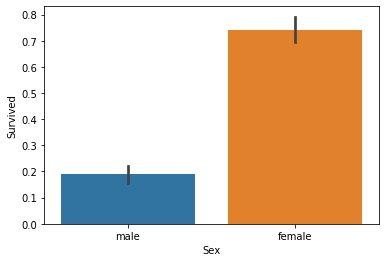

In [69]:
sns.barplot(x='Sex', y='Survived', data=train);


Women and children first as they used to say (I think).

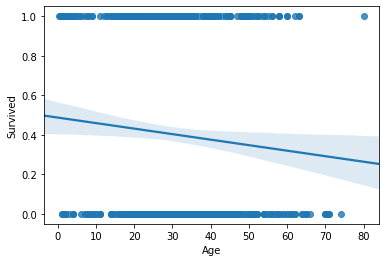

In [71]:
sns.regplot(train.Age, train.Survived, data=train) ;

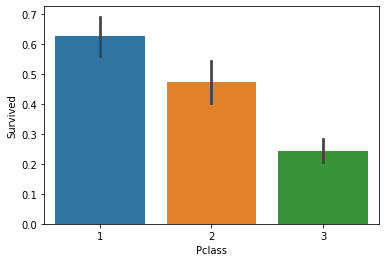

In [73]:
sns.barplot(x='Pclass', y='Survived', data=train);

I guess the passengers who payed extra were glad they weren't stingy :/

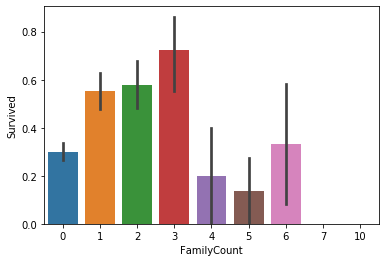

In [74]:
sns.barplot(x='FamilyCount', y='Survived', data=train);

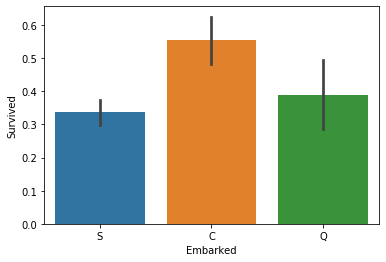

In [76]:
sns.barplot(x='Embarked', y='Survived', data=train);

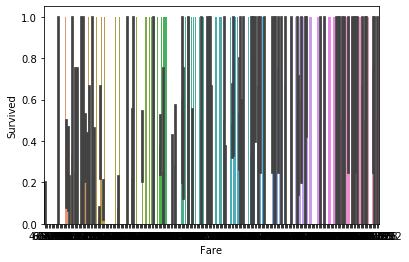

In [77]:
sns.barplot(x='Fare', y='Survived', data=train);

In [78]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverand', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Is_female',
       'Is_male_temp', 'Is_male', 'Is_empty_temp', 'Is_empty',
       'male_survivors'],
      dtype='object')